In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

In [21]:
def BFS(start, visited, adj_mat):         
        q = [start]
        visited[start] = True
        lst = []
        while q:
            vis = q[0]
            lst.append(vis)
            q.pop(0)
            for i in range(15):
                if (adj_mat[vis][i] == 1 and
                      (not visited[i])):
                    q.append(i)
                    visited[i] = True
        return lst

def DFS(start, visited, lst, adj_mat):
        if visited[start] is not True:
          lst.append(start)
        visited[start] = True
        for i in range(15):
            if (adj_mat[start][i] == 1 and
                    (not visited[i])):
                DFS(i, visited, lst, adj_mat)

def dfs_traversal(source):
  lst = [source]
  for i,j in list(nx.dfs_edges(g, source=source)):
    lst.append(j)
  return lst

def bfs_traversal(source):
  lst = [source]
  for i,j in list(nx.bfs_edges(g, source=source)):
    lst.append(j)
  return lst

def generateRandomGraph():
  g = nx.balanced_tree(2,3)
  nx.draw_networkx(g)
  plt.savefig('graph.png', dpi=300, bbox_inches='tight')
  plt.show()
  return g

def networkx_traversals(start):
  dfs_lst = dfs_traversal(start)
  print("DFS: ", dfs_lst)
  bfs_lst = bfs_traversal(start)
  print("BFS: ", bfs_lst)
  return bfs_lst, dfs_lst

def customCode_traversals(g, start):
  adj_mat = np.array(nx.adjacency_matrix(g).todense())

  visited = [False] * 15
  dfs_lst = []
  DFS(start, visited, dfs_lst, adj_mat)
  print("DFS: ", dfs_lst)

  visited = [False] * 15
  bfs_lst = BFS(start, visited, adj_mat)
  print("BFS: ", bfs_lst)

  return bfs_lst, dfs_lst, adj_mat

def combining_dfs_bfs(bfs_lst, bfs_iterations, adj_mat):
  vis_lst = [False]*15
  for i in range(bfs_iterations):
    vis_lst[bfs_lst[i]]=True  
  #print(vis_lst)

  dfs_lst_new = []
  DFS(bfs_lst[bfs_iterations],vis_lst,dfs_lst_new, adj_mat)
  print("bfs initial part: ",bfs_lst[:bfs_iterations])
  print(f"dfs part starting from {bfs_lst[bfs_iterations]}: ", dfs_lst_new)

  final_lst = bfs_lst[:bfs_iterations] + dfs_lst_new
  return final_lst

def running_algorithm(start_node):
  n = start_node
  print(f"Starting from node {n}")
  bfs_lst, dfs_lst, adj_mat = customCode_traversals(g, start=n)
  print()
  print("Running BFS for first 5 iterations: ")
  final_lst = combining_dfs_bfs(bfs_lst=bfs_lst, bfs_iterations=4, adj_mat=adj_mat)
  return bfs_lst, dfs_lst, final_lst

def writeOutput(bfs_lst, dfs_lst, final_lst, filename='output.txt' ):
  f = open(filename,'w')

  f.write("BFS: ")
  for i in bfs_lst:
    f.write(str(i))
    f.write(" ")
  f.write("\n")
  f.write("DFS: ")
  for i in dfs_lst:
    f.write(str(i))
    f.write(" ")
  f.write("\n")
  f.write("Combined-first-4-iterations-bfs: ")
  for i in final_lst:
    f.write(str(i))
    f.write(" ")
  f.write("\n")

  f.close()

def readOutput(filename='output.txt'):
  f = open(filename,'r')

  lst = f.readlines()

  bfs_lst = lst[0].split()[1:]
  dfs_lst = lst[1].split()[1:]
  final_lst = lst[2].split()[1:]
  bfs_lst = [int(i) for i in bfs_lst]
  dfs_lst = [int(i) for i in dfs_lst]
  final_lst = [int(i) for i in final_lst]

  return bfs_lst, dfs_lst, final_lst

def main():
  g = generateRandomGraph()

  starting_node = random.randint(3,14)
  bfs_lst, dfs_lst, combined_lst = running_algorithm(starting_node)

  writeOutput(bfs_lst, dfs_lst, combined_lst)

  return bfs_lst, dfs_lst, combined_lst

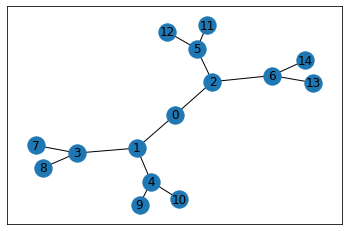

Starting from node 10
DFS:  [10, 4, 1, 0, 2, 5, 11, 12, 6, 13, 14, 3, 7, 8, 9]
BFS:  [10, 4, 1, 9, 0, 3, 2, 7, 8, 5, 6, 11, 12, 13, 14]

Running BFS for first 5 iterations: 
bfs initial part:  [10, 4, 1, 9]
dfs part starting from 0:  [0, 2, 5, 11, 12, 6, 13, 14]


In [23]:
bfs_lst, dfs_lst, combined_lst = main()